# Домашнее задание. Решение конкурса на kaggle.com

Это домашнее задание посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания:

### Отправить ваши предсказания в Stepik.
За прохождение определенных порогов будут начисляться баллы. Эта часть оценивается из 5 баллов.

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

Для этого мы предварительно разделили данные в задании на две части.
* `train.csv`. На этом наборе данных вам необходимо создать и обучить модель. Подробное описание файла есть в ноутбуке.
* `test.csv`. В каждой строчке файла `test.csv` указаны признаки тестовых объектов. Предсказания для этого набора необходимо записать в файл submission.csv и сдать в соответствующий шаг на Stepik. Количество попыток ограничено 100 штук.

Отправлять в Stepik вы будете файл с ответами `my_submission.csv`. В этом файле вам необходимо для каждого объекта из датасета предсказать вероятность класса 1. Мы подготовили для вас файл с примером посылки `submission.csv`. Ваш файл должен быть оформлен таким же образом. В ноутбуке есть пример оформления файла посылки. Для отправки файла с предсказаниями на Stepik есть отдельный шаг.

### Сделать полноценный отчет о вашей работе.
Опишите, как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов. В этом пункте вам необходимо отправить файл в формате .ipynb на Stepik --- для этого в домашнем задании есть отдельный шаг. Этот пункт оценивается из 10 баллов.

**Вторая часть будет проверяться в формате peer-review. Т.е. вашу посылку на Stepik будут проверять 3 других студента, и медианное значение их оценок будет выставлено. Чтобы получить баллы, вам также нужно будет проверить трех других учеников. Это станет доступно после того, как вы сдадите задание сами.**

### Контест на Kaggle
Для вашего удобства мы подготовили [контест на Kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/). Тестирующая система на Kaggle выдает те же баллы, что и Stepik. Мы рекомендуем в качестве основной тестирующей системы использовать именно Kaggle, а затем сдать лучшую посылку на Stepik. Так вы привыкните работать с Kaggle.

Проблема для российских пользователей Kaggle заключается в том, что подтверждение аккаунта по номеру телефона работает с перебоями или не работает вообще. Без подтвержденного номера телефона вы не сможете совершать посылки в kaggle. Если у вас возникла такая проблема, мы советуем следующие шаги:
* Попробовать зарегистрировать аккаунт с аутентификацией через gmail. В таком случае, аккаунт должен работать без подтверждения номера телефона.
* Если у вас есть не российский номер, используйте его для верификации аккаунта.
* Если на номер телефона не приходит смс для верификации аккаунта, обратитесь в службу поддержки kaggle. Они с переменным успехом умеют подтверждать аккаунты вручную.
* Если все же подтвердить аккаунт и получить доступ к сдаче заданий не удалось, используйте только сдачу в Stepik.

### Несколько замечаний по выполнению работы
* Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое --- дерзайте!
* Пожалуйста, перед сдачей ноутбука убедитесь, что работа чистая и понятная. Это значительно облегчит проверку и повысит ваши ожидаемые баллы.
* Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме.


Данные: [train.csv](https://drive.google.com/file/d/1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K/view?usp=share_link),
[test.csv](https://drive.google.com/file/d/1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r/view?usp=share_link), [submission.csv](https://drive.google.com/file/d/199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y/view?usp=share_link).

Если ссылки на данные не работают, их можно скачать [на Kaggle](https://www.kaggle.com/competitions/advanced-dls-spring-2021/data).

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендации снижайте 1 балл.

**Если решение верное, но не удовлетворяет вашим эстетическим предпочтениям, за это баллы снижать не нужно.**

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить, используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [567]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [568]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [569]:
# !gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
# !gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
# !gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

In [570]:
data = pd.read_csv('./train.csv')
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [571]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

Проверим, есть ли в датасете пропущенные значения:

In [572]:
data.replace(' ', np.nan, inplace=True)
data.dropna(inplace=True)

In [573]:
data['TotalSpent'] = data['TotalSpent'].astype(float)
data['TotalSpent']

0       1026.35
1       1872.20
2         75.90
3       2570.00
4       6758.45
         ...   
5277      82.15
5278    2188.45
5279      55.05
5280    2215.25
5281    1375.60
Name: TotalSpent, Length: 5273, dtype: float64

In [574]:
for col in feature_cols + [target_col]:
    print(f'{col}: {data[col].isna().sum()}')

ClientPeriod: 0
MonthlySpending: 0
TotalSpent: 0
Sex: 0
IsSeniorCitizen: 0
HasPartner: 0
HasChild: 0
HasPhoneService: 0
HasMultiplePhoneNumbers: 0
HasInternetService: 0
HasOnlineSecurityService: 0
HasOnlineBackup: 0
HasDeviceProtection: 0
HasTechSupportAccess: 0
HasOnlineTV: 0
HasMovieSubscription: 0
HasContractPhone: 0
IsBillingPaperless: 0
PaymentMethod: 0
Churn: 0


## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

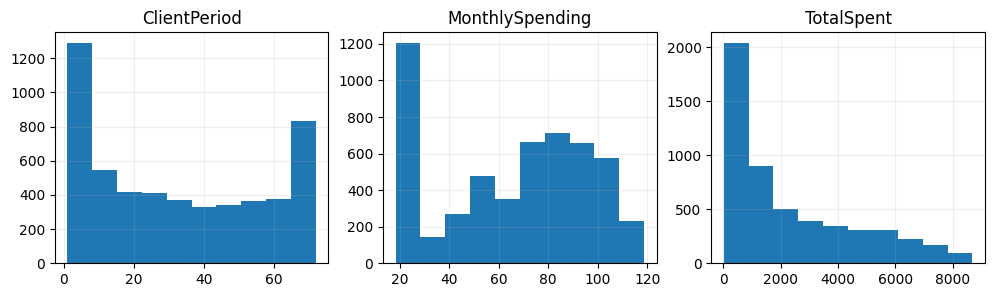

In [575]:
plt.figure(figsize=(12, 3))
for i, col in enumerate(num_cols):
    ax = plt.subplot(1, len(num_cols), i + 1)
    plt.title(col)
    plt.hist(data[col])
    plt.grid(alpha=0.2)

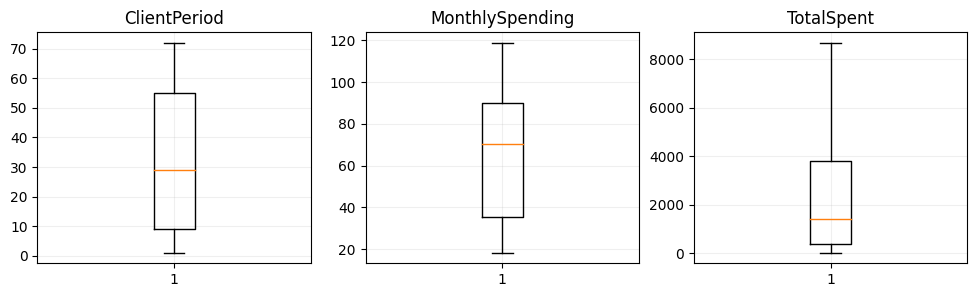

In [576]:
plt.figure(figsize=(12, 3))
for i, col in enumerate(num_cols):
    ax = plt.subplot(1, len(num_cols), i + 1)
    plt.title(col)
    plt.boxplot(data[col])
    plt.grid(alpha=0.2)

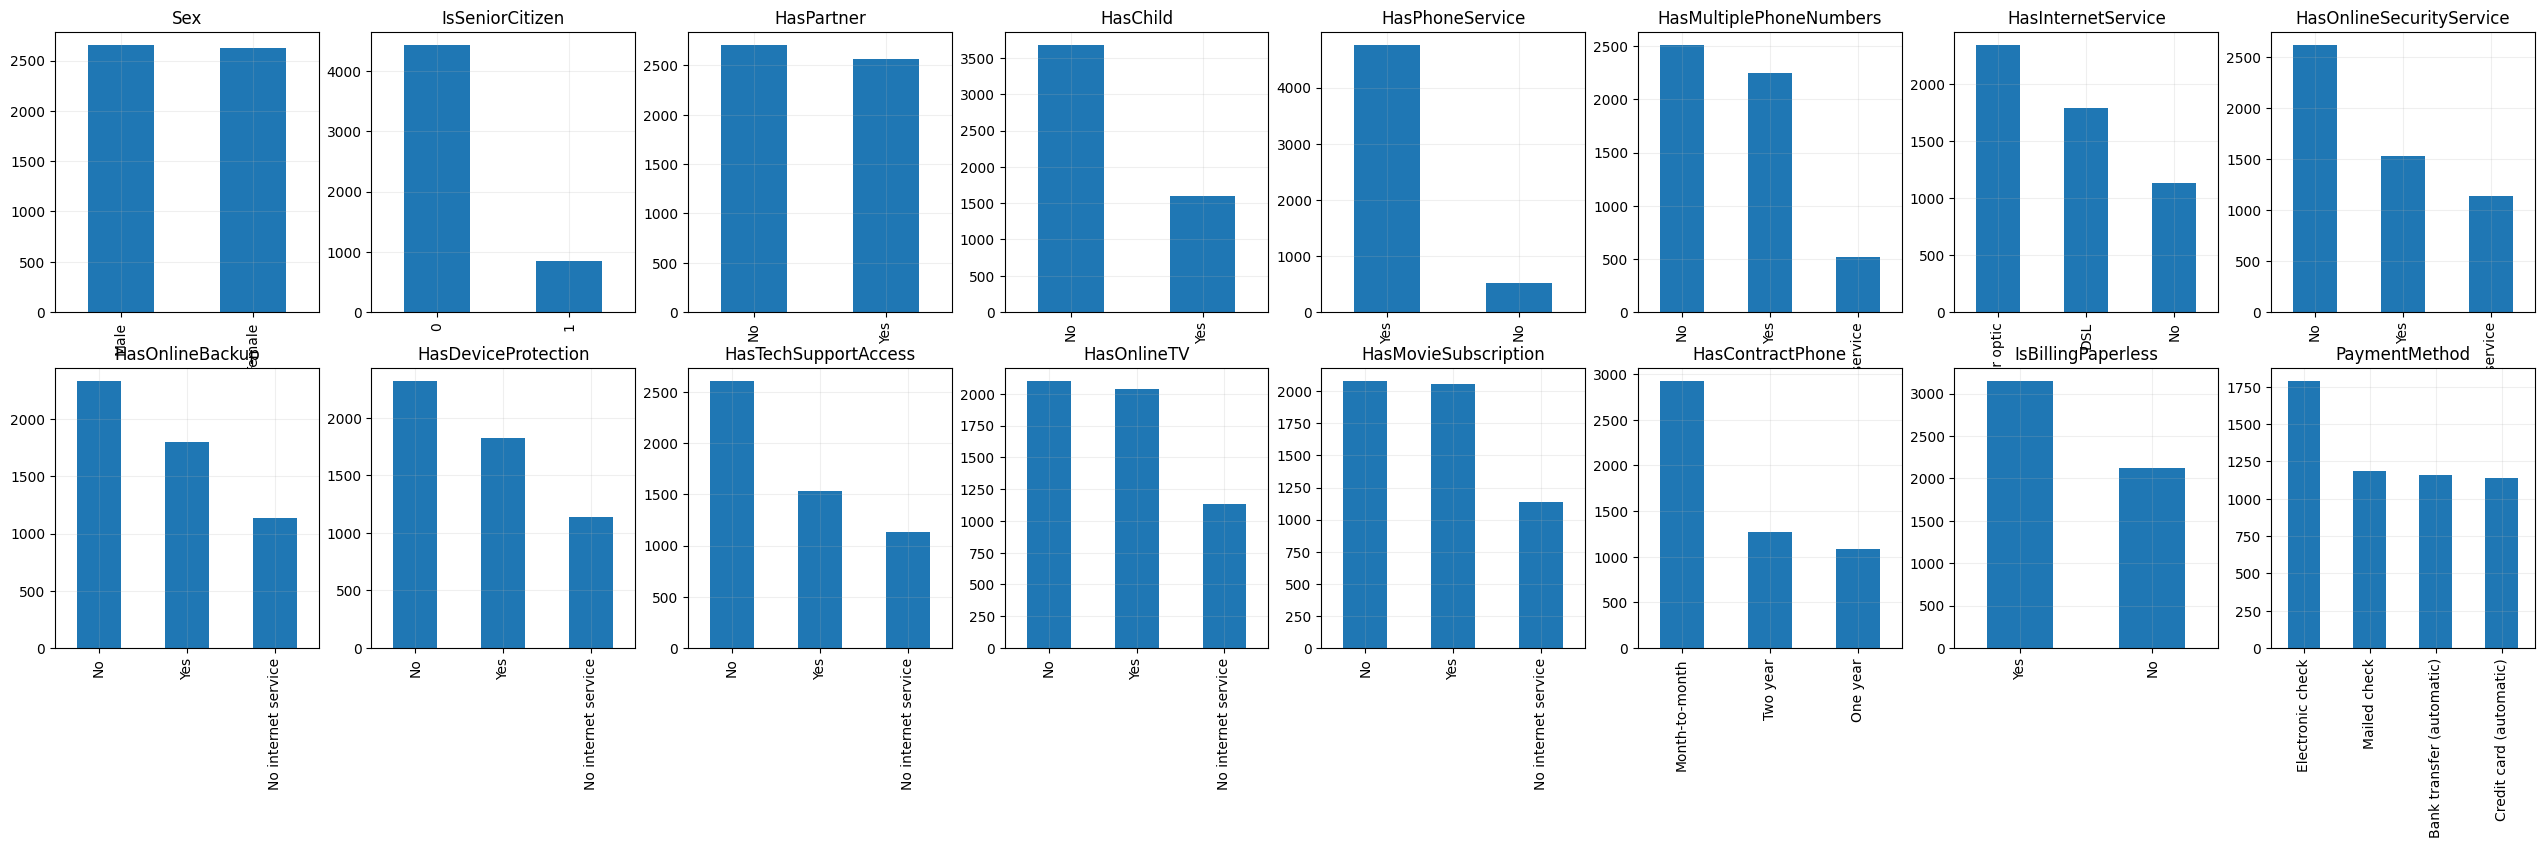

In [577]:
plt.figure(figsize=(32, 8))

for i, col in enumerate(cat_cols):
    ax = plt.subplot(2, 8, i + 1)
    plt.title(col)
    data[col].value_counts().plot(kind='bar')
    plt.grid(alpha=0.2)

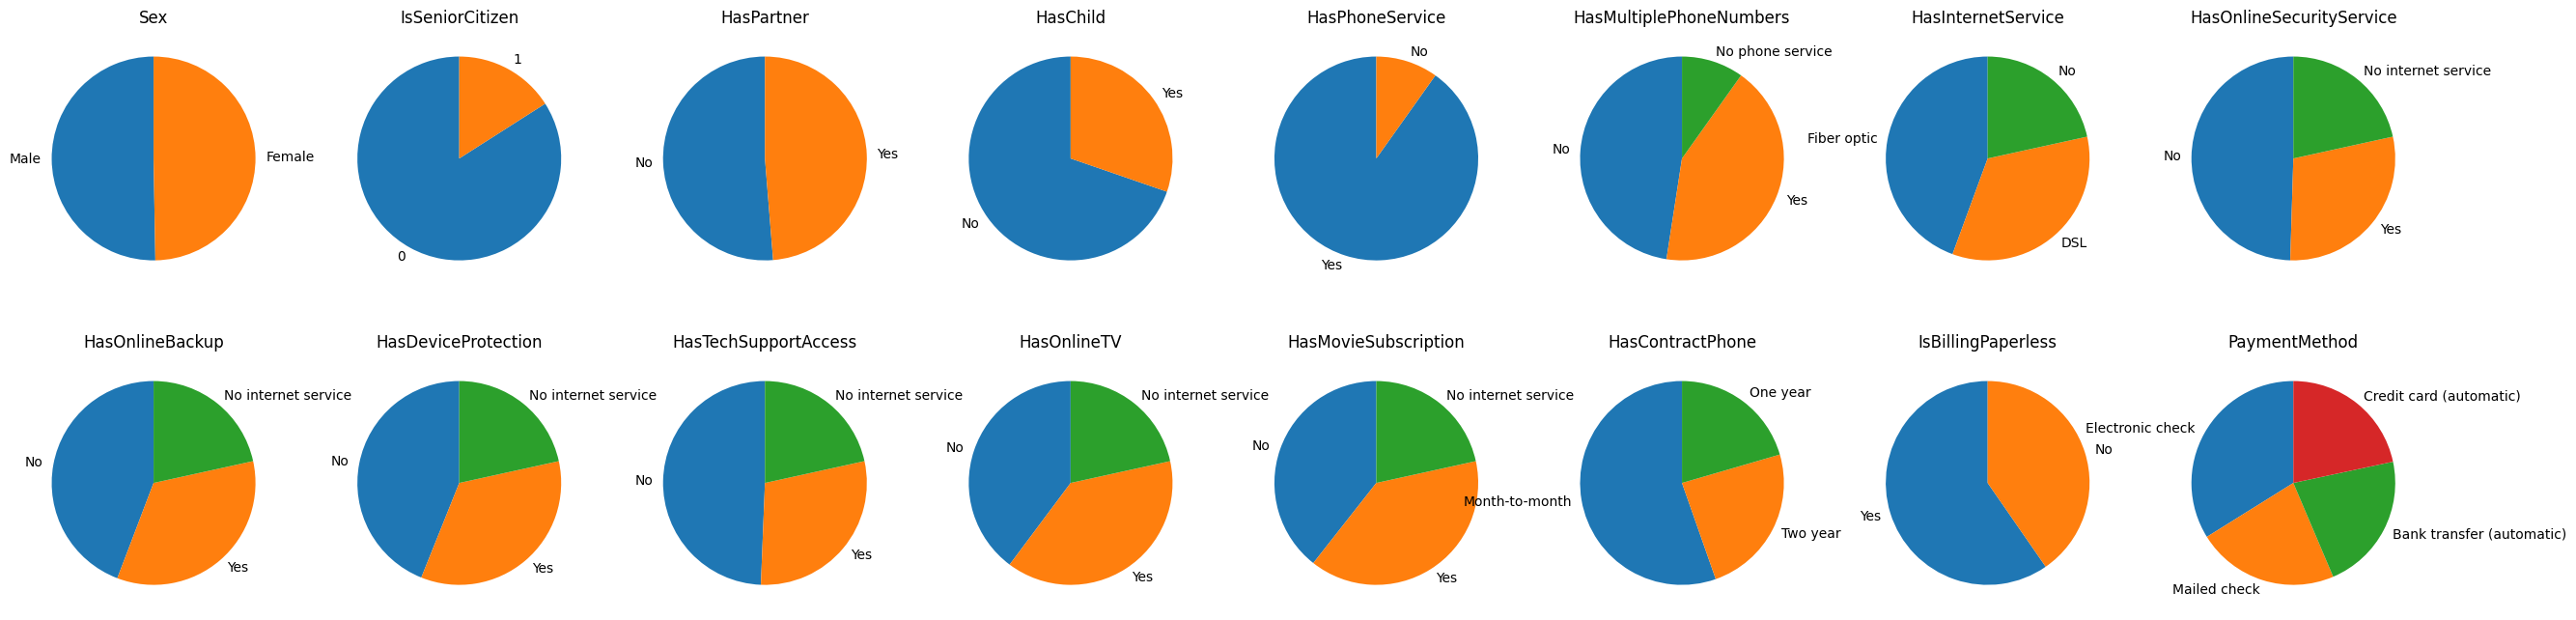

In [578]:
plt.figure(figsize=(32, 8))

for i, col in enumerate(cat_cols):
    ax = plt.subplot(2, 8, i + 1)
    plt.title(col)
    data[col].value_counts().plot(kind='pie', startangle=90)
    plt.ylabel(None)

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

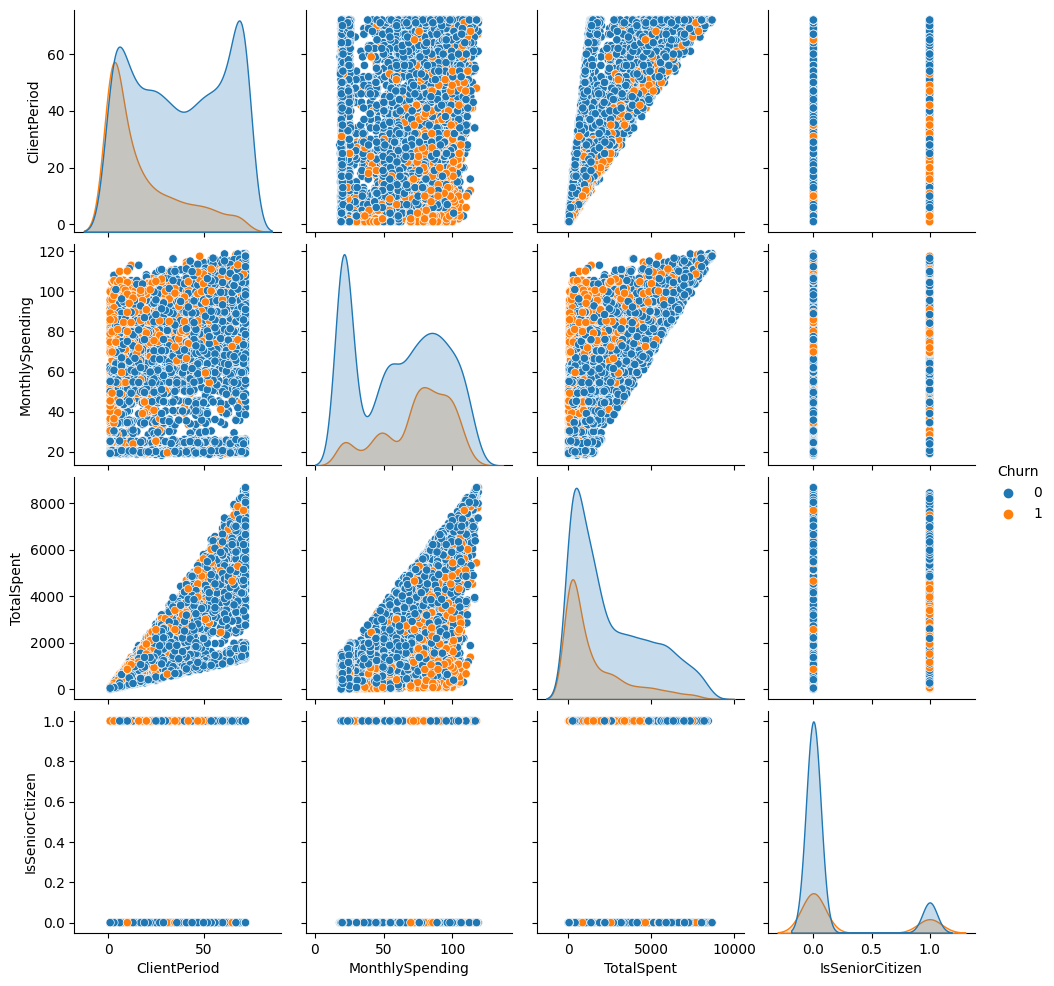

In [579]:
import seaborn as sns

sns.pairplot(data, hue='Churn')

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [615]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

<h3> Первый способ

In [616]:
X_train, X_valid, y_train, y_valid = train_test_split(data[num_cols + cat_cols], data[target_col], train_size=0.8, random_state=42)
X_train.shape

(4218, 19)

In [617]:
X_train_transformed = X_train.copy()

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols].to_numpy())

In [618]:
encoder = OneHotEncoder()
X_train_transformed = np.hstack((X_train[num_cols].to_numpy(), encoder.fit_transform(X_train[cat_cols].to_numpy()).toarray()))

In [619]:
grid = {'C': [100, 10, 1, 0.1, 0.01, 0.001]}

classifier = LogisticRegression(max_iter=1000)

grid_search = GridSearchCV(classifier, param_grid=grid, scoring='roc_auc', n_jobs=-1, refit=True)
grid_search.fit(X_train_transformed, y_train.to_numpy())

GridSearchCV(estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [100, 10, 1, 0.1, 0.01, 0.001]},
             scoring='roc_auc')

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [620]:
print(f'best params: {grid_search.best_params_}')
print(f'best score: {grid_search.best_score_}')

best params: {'C': 10}
best score: 0.8447301587883185


In [621]:
best_est = grid_search.best_estimator_

Проверим скор на нормализованной тестовой выборке:

In [622]:
X_valid_transformed = scaler.transform(X_valid[num_cols].to_numpy())
X_valid_transformed = np.hstack((X_valid_transformed, encoder.transform(X_valid[cat_cols].to_numpy()).toarray()))
y_pred = best_est.predict_proba(X_valid_transformed)
print(f'Train score: {roc_auc_score(y_valid, y_pred[:, 1])}')

Train score: 0.8439867893371078


Cкор на тестовой выборке без нормализации:

In [623]:
X_valid_not_scaled = np.hstack((X_valid[num_cols].to_numpy(), encoder.transform(X_valid[cat_cols].to_numpy()).toarray()))
y_pred = best_est.predict_proba(X_valid_not_scaled)
print(f'Valid score: {roc_auc_score(y_valid, y_pred[:, 1])}')

Valid score: 0.40089171974522286


### Второй способ

In [624]:
from sklearn.compose import ColumnTransformer


preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), num_cols),
        ('encoder', OneHotEncoder(), cat_cols)
    ],
    remainder='passthrough'
)


grid = {'logisticregression__C': [100, 10, 1, 0.1, 0.01, 0.001]}

classifier = make_pipeline(
    preprocessor,
    LogisticRegression(max_iter=1000)
)

grid_search = GridSearchCV(classifier, param_grid=grid, scoring='roc_auc', n_jobs=-1, refit=True)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaler',
                                                                         StandardScaler(),
                                                                         ['ClientPeriod',
                                                                          'MonthlySpending',
                                                                          'TotalSpent']),
                                                                        ('encoder',
                                                                         OneHotEncoder(),
                                                                         ['Sex',
                                                                          'IsSeniorCitizen',
                                                                          'HasPartner',
                                                                          'HasChild',
                                                                          'HasPhoneService',
                                                                          'HasMultiplePhoneNumbers',
                                                                          'HasInternetService',
                                                                          'HasOnlineSecurityService',
                                                                          'HasOnlineBackup',
                                                                          'HasDeviceProtection',
                                                                          'HasTechSupportAccess',
                                                                          'HasOnlineTV',
                                                                          'HasMovieSubscription',
                                                                          'HasContractPhone',
                                                                          'IsBillingPaperless',
                                                                          'PaymentMethod'])])),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=1000))]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [100, 10, 1, 0.1, 0.01,
                                                   0.001]},
             scoring='roc_auc')

In [625]:
print(f'best params: {grid_search.best_params_}')
print(f'best score: {grid_search.best_score_}')

best params: {'logisticregression__C': 10}
best score: 0.8447113369341602


Проверим скор на нормализованной тестовой выборке:

In [626]:
best_est = grid_search.best_estimator_
best_est.fit(X_train, y_train)
y_pred = best_est.predict_proba(X_valid)
print(f'Train score: {roc_auc_score(y_valid, y_pred[:, 1])}')

Train score: 0.4009011559330031


In [627]:
best_est = grid_search.best_estimator_
best_est.fit(X_train, y_train)
y_pred = best_est.predict_proba(X_train)
print(f'Train score: {roc_auc_score(y_train, y_pred[:, 1])}')

Train score: 0.8497373806196672


## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [628]:
#!pip install catboost

In [629]:
X_train, X_valid, y_train, y_valid = train_test_split(data[num_cols + cat_cols], data[target_col], train_size=0.8, random_state=42)

In [630]:
from catboost import CatBoostClassifier

classifier = CatBoostClassifier()
classifier.fit(X_train, y_train, cat_features=cat_cols)

Learning rate set to 0.019048
0:	learn: 0.6801499	total: 16.5ms	remaining: 16.4s
1:	learn: 0.6683861	total: 30.6ms	remaining: 15.2s
2:	learn: 0.6574055	total: 41.5ms	remaining: 13.8s
3:	learn: 0.6459140	total: 55.3ms	remaining: 13.8s
4:	learn: 0.6353605	total: 69.9ms	remaining: 13.9s
5:	learn: 0.6261610	total: 80.8ms	remaining: 13.4s
6:	learn: 0.6167841	total: 92.7ms	remaining: 13.2s
7:	learn: 0.6080311	total: 115ms	remaining: 14.2s
8:	learn: 0.5997483	total: 129ms	remaining: 14.2s
9:	learn: 0.5918432	total: 143ms	remaining: 14.2s
10:	learn: 0.5839242	total: 157ms	remaining: 14.1s
11:	learn: 0.5766678	total: 170ms	remaining: 14s
12:	learn: 0.5701751	total: 179ms	remaining: 13.6s
13:	learn: 0.5631203	total: 192ms	remaining: 13.6s
14:	learn: 0.5566815	total: 209ms	remaining: 13.7s
15:	learn: 0.5507060	total: 222ms	remaining: 13.7s
16:	learn: 0.5449043	total: 239ms	remaining: 13.8s
17:	learn: 0.5390888	total: 251ms	remaining: 13.7s
18:	learn: 0.5338561	total: 265ms	remaining: 13.7s
19:	le

In [631]:
y_pred = classifier.predict_proba(X_valid)
print(f'Parameters: default, score: {roc_auc_score(y_valid, y_pred[:, 1])}')

Parameters: default, score: 0.8404411417787214


In [635]:
param_grid = {
    'num_trees': [2**x for x in range(4, 11)],
    'learning_rate': [5 / 10**x for x in range(1, 5)],
    'depth': [4],
    'min_data_in_leaf': [100]
}

grid_search = GridSearchCV(classifier, param_grid=param_grid, scoring='roc_auc', n_jobs=-1)

In [636]:
grid_search.fit(X_train, y_train, cat_features=cat_cols)

0:	learn: 0.6754994	total: 3.55ms	remaining: 451ms
1:	learn: 0.6588617	total: 7.02ms	remaining: 442ms
2:	learn: 0.6441925	total: 10.6ms	remaining: 441ms
3:	learn: 0.6303613	total: 13.5ms	remaining: 420ms
4:	learn: 0.6176453	total: 16.4ms	remaining: 402ms
5:	learn: 0.6059242	total: 19.1ms	remaining: 389ms
6:	learn: 0.5946326	total: 22ms	remaining: 380ms
7:	learn: 0.5844170	total: 24.6ms	remaining: 369ms
8:	learn: 0.5744354	total: 27.3ms	remaining: 361ms
9:	learn: 0.5661370	total: 30.2ms	remaining: 356ms
10:	learn: 0.5581100	total: 33ms	remaining: 351ms
11:	learn: 0.5502645	total: 35.7ms	remaining: 345ms
12:	learn: 0.5437846	total: 38.4ms	remaining: 340ms
13:	learn: 0.5374000	total: 41.2ms	remaining: 335ms
14:	learn: 0.5314601	total: 43.9ms	remaining: 331ms
15:	learn: 0.5249147	total: 46.8ms	remaining: 327ms
16:	learn: 0.5184548	total: 49.6ms	remaining: 324ms
17:	learn: 0.5125503	total: 52.6ms	remaining: 321ms
18:	learn: 0.5073079	total: 55.3ms	remaining: 317ms
19:	learn: 0.5021504	total

GridSearchCV(estimator=<catboost.core.CatBoostClassifier object at 0x7f4ff63b87f0>,
             n_jobs=-1,
             param_grid={'depth': [4],
                         'learning_rate': [0.5, 0.05, 0.005, 0.0005],
                         'min_data_in_leaf': [100],
                         'num_trees': [16, 32, 64, 128, 256, 512, 1024]},
             scoring='roc_auc')

Выпишите, какое лучшее качество и с какими параметрами вам удалось получить

In [638]:
best_cls = grid_search.best_estimator_
y_pred = best_cls.predict_proba(X_valid)
print(f'Parameters: {grid_search.best_params_}, score: {roc_auc_score(y_valid, y_pred[:, 1])}')

Parameters: {'depth': 4, 'learning_rate': 0.05, 'min_data_in_leaf': 100, 'num_trees': 128}, score: 0.8411559330030667


ВАШ ОТВЕТ

# Предсказания

In [640]:
best_model = best_cls

In [663]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission = submission[['Id', 'Churn']]
submission.to_csv('./my_submission.csv', index=False)

Лучшее решение отправьте в Stepik.